In [145]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

training_data = pd.read_csv('../data/train_u6lujuX_CVtuZ9i.csv')
testing_data = pd.read_csv('../data/test_Y3wMUE5_7gLdaTN.csv')
%matplotlib inline
# training_data[training_data.apply(lambda x: x['Credit_History'] == 0 and x['Loan_Status'] == 'Y',axis = 1)]

In [146]:
training_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [147]:
training_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [148]:
training_data.groupby(['Loan_Status']).describe()

ApplicantIncome  CoapplicantIncome  Credit_History  \
Loan_Status                                                             
N           count       192.000000         192.000000      179.000000   
            mean       5446.078125        1877.807292        0.541899   
            std        6819.558528        4384.060103        0.499639   
            min         150.000000           0.000000        0.000000   
            25%        2885.000000           0.000000             NaN   
            50%        3833.500000         268.000000             NaN   
            75%        5861.250000        2273.750000             NaN   
            max       81000.000000       41667.000000        1.000000   
Y           count       422.000000         422.000000      385.000000   
            mean       5384.068720        1504.516398        0.981818   
            std        5765.441615        1924.754855        0.133782   
            min         210.000000           0.000000        0.000000   
            25%        2877.500000           0.000000             NaN   
            50%        3812.500000        1239.500000             NaN   
            75%        5771.500000        2297.250000             NaN   
            max       63337.000000       20000.000000        1.000000   

                   LoanAmount  Loan_Amount_Term  
Loan_Status                                      
N           count  181.000000        186.000000  
            mean   151.220994        344.064516  
            std     85.862783         69.238921  
            min      9.000000         36.000000  
            25%           NaN               NaN  
            50%           NaN               NaN  
            75%           NaN               NaN  
            max    570.000000        480.000000  
Y           count  411.000000        414.000000  
            mean   144.294404        341.072464  
            std     85.484607         63.247770  
            min     17.000000         12.000000  
            25%           NaN               NaN  
            50%           NaN               NaN  
            75%           NaN               NaN  
            max    700.000000        480.000000

In [149]:
training_data.isnull().sum(axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [150]:
testing_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [151]:
training_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378
Loan_Status            N         Y
Credit_History                    
0.0             0.921348  0.078652
1.0             0.204211  0.795789


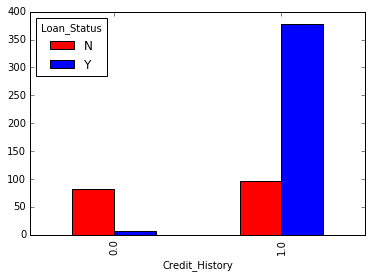

In [152]:
credit_loan = pd.crosstab(training_data['Credit_History'], training_data['Loan_Status'], margins=False)
print(credit_loan)
credit_loan_rate = credit_loan.apply(lambda row: row/row.sum(), axis=1)
print(credit_loan_rate)
credit_loan.plot(kind='bar', color = ["red", "blue"])

In [153]:
# training_data[training_data['Credit_History'].isnull()]

In [154]:
# testing_data[testing_data['Credit_History'].isnull()]

In [155]:
# dealing with three missing 'Married' value
training_data['Married'].value_counts()
pd.pivot_table(training_data, values ='LoanAmount', index=['Education'], columns=['Married'], aggfunc=np.median)

Married,No,Yes
Education,,
Graduate,118.0,137.5
Not Graduate,110.0,121.5


In [156]:
training_data[training_data['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [157]:
loanAmount_pivot = pd.pivot_table(training_data, values='LoanAmount', index=['Gender', 'Self_Employed'], columns=['Education'], aggfunc=np.median)
loanAmount_pivot['Graduate']['Female']['No']

112.5

In [158]:
# Fill in Gender
# one assumption: if CoapplicantIncome == 0 and married , then Gender == male. case housewife
training_data[(training_data['CoapplicantIncome'] == 0) & (training_data['Married'] == 'No') 
             & (training_data['Self_Employed'] == 'Yes')]['Gender'].value_counts()

Male      12
Female    10
Name: Gender, dtype: int64

In [175]:
training_data['Loan_Amount_Term'].value_counts()
testing_data.count()

Loan_ID              367
Gender               356
Married              367
Dependents           357
Education            367
Self_Employed        344
ApplicantIncome      367
CoapplicantIncome    367
LoanAmount           362
Loan_Amount_Term     361
Credit_History       338
Property_Area        367
dtype: int64

In [160]:
training_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [161]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction import DictVectorizer

def encode_onehot(df, cols):
    """
    One-hot encoding is applied to columns specified in a pandas DataFrame.
    
    Modified from: https://gist.github.com/kljensen/5452382
    
    Details:
    
    http://en.wikipedia.org/wiki/One-hot
    http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
    
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    vec = DictVectorizer()
    
    vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict(orient='records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    return df

def fill_nans(X, y=None):
    df = X.copy()
    
    df.drop('Loan_ID', axis=1, inplace=True)
    df['Married'] = df.apply(lambda row: 'Yes' if row['CoapplicantIncome'] == 0 else 'No', axis =1) 
    df['Dependents'].fillna(0.0, inplace=True)
    df['Gender'].fillna('Male', inplace=True)
    df['Self_Employed'].fillna('No', inplace=True)
    df['LoanAmount'] = df.apply(lambda row: loanAmount_pivot[row['Education']][row['Gender']][row['Married']] if row['LoanAmount'] else row['LoanAmount'],axis=1)
    df['Loan_Amount_Term'].fillna(360.0, inplace=True)
    df['Credit_History'].fillna(0.0, inplace=True)
    
    return df


def data_process(df):
    df['Credit_History'] = df['Credit_History'].fillna(1.0)
    df['Education'] = df['Education'].apply(lambda edu: 1 if edu == 'Graduate' else 0)
    df['Gender'] = df['Gender'].apply(lambda gender: 0 if gender == 'Female' else 1)
    df['Married'] = df['Married'].apply(lambda gender: 1 if gender == 'Yes' else 1) 
    df['Self_Employed'] = df['Self_Employed'].apply(lambda self_employed: 1 if self_employed == 'Yes' else 0)
#     df['Loan_Status'] = df['Loan_Status'].apply(lambda loan_status: 1 if loan_status == 'Y' else 0)
    df['MonthPayment'] = df['LoanAmount'] / df['Loan_Amount_Term']
    df['Dependents'] = df['Dependents'].apply(lambda deps: 3 if deps == '3+' else int(deps))
    df = encode_onehot(df, ['Property_Area'])
    return df

fillna_transformer = FunctionTransformer(fill_nans, validate=False)
# training_df = fillna_transformer.transform(training_data)
# training_df.isnull().sum()

In [162]:
train_df = fill_nans(training_data.drop(['Loan_Status'], axis =1))
test_df = fill_nans(testing_data)
train_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [163]:
train_df = data_process(train_df)
test_df=data_process(test_df)
train_df.dtypes

Gender                       int64
Married                      int64
Dependents                   int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
MonthPayment               float64
Property_Area=Rural        float64
Property_Area=Semiurban    float64
Property_Area=Urban        float64
dtype: object

In [164]:
# plt.boxplot(train_df['MonthPayment'])
train_df['Property_Area=Urban'].value_counts()

0.0    412
1.0    202
Name: Property_Area=Urban, dtype: int64

In [165]:
# from sklearn.pipeline import Pipeline

# FEATURE_COLUMNS = ['Credit_History', 'Gender', 'Married', 'Loan_Status']

# def select_columns(X):
#     return X[FEATURE_COLUMNS]

# select_transformer = FunctionTransformer(select_columns, validate=False)

# stage = {('fillna', fillna_transformer)}#, ('selectColumns', select_transformer)}


# feature_process = Pipeline(stage)
# training_features = feature_process.transform(training_data)
# training_features

In [182]:
label = training_data['Loan_Status'].apply(lambda loan_status: 1 if loan_status == 'Y' else 0)

FEATURE_COLUMNS = ['Gender', 'Married', 'Dependents',
                   'Education', 'Self_Employed', 'ApplicantIncome',
                   'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                   'Credit_History', 'MonthPayment',
                   'Property_Area=Urban','Property_Area=Rural','Property_Area=Semiurban']

X_train, X_test, y_train, y_test = train_test_split(train_df[FEATURE_COLUMNS], label, test_size=0.2, random_state=1)

def display_result(y_true_, y_pred_):
    accuracy = accuracy_score(y_true=y_true_, y_pred=y_pred_)
    conf_matrix = confusion_matrix(y_true=y_true_, y_pred=y_pred_)
    print("Classification Accuracy: {}".format(accuracy))
    print("Confusion matrix:\n{}".format(conf_matrix))
    
def write_to_csv(filename, loan_ids, predict_results, message=""):
    predict_label= pd.Series(predict_results).replace({0: 'N', 1: 'Y'})
    with open(filename, 'w') as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerow(["Loan_ID", "Loan_Status"])
        writer.writerows(zip(loan_ids, predict_label))
    print(message)

# Non-trained model

In [183]:
y_pred = train_df['Credit_History']
display_result(label, y_pred)

y_test_pred = [1]*367 #test_df['Credit_History']
write_to_csv('baseline.csv', testing_data['Loan_ID'], y_test_pred, 'baseline')

Classification Accuracy: 0.7703583061889251
Confusion matrix:
[[ 95  97]
 [ 44 378]]
baseline


# LR Model

In [168]:
m1_clf = LogisticRegression(C=1)

m1_clf.fit(X_train, y_train)

y_pred = m1_clf.predict(X_train)
display_result(y_true_=y_train, y_pred_=y_pred)

y_pred = m1_clf.predict(X_test)
display_result(y_true_=y_test, y_pred_=y_pred)

# linear model is underfitting, since the dataset is not linearly separatable

Classification Accuracy: 0.769857433808554
Confusion matrix:
[[ 75  78]
 [ 35 303]]
Classification Accuracy: 0.7723577235772358
Confusion matrix:
[[16 23]
 [ 5 79]]


# Decision Tree

In [169]:
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

# Model is overfitting
y_train_pred = dt_clf.predict(X_train)
display_result(y_true_=y_train, y_pred_=y_train_pred)

y_test_pred = dt_clf.predict(X_test)
display_result(y_true_=y_test, y_pred_=y_test_pred)

#Tunning parameter to prevent overfitting
parameters = {'max_depth': np.arange(3,9,1),
              'min_samples_leaf':np.arange(3,30,2)}
gs_clf = GridSearchCV(dt_clf, parameters, n_jobs=-1, cv=5, refit=True)
gs_clf.fit(X_train, y_train)
gs_clf.grid_scores_

best_dt_clf = gs_clf.best_estimator_
print(best_dt_clf)
best_dt_pred = best_dt_clf.predict(X_test)
display_result(y_true_=y_test, y_pred_=best_dt_pred)

test_dt_pred = best_dt_clf.predict(test_df)
write_to_csv('dt_tuned.csv', testing_data['Loan_ID'], test_dt_pred, 'tuned dt model')

Classification Accuracy: 1.0
Confusion matrix:
[[153   0]
 [  0 338]]
Classification Accuracy: 0.7073170731707317
Confusion matrix:
[[19 20]
 [16 68]]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=19,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Classification Accuracy: 0.7886178861788617
Confusion matrix:
[[18 21]
 [ 5 79]]
tuned dt model


In [170]:
m2_clf = RandomForestClassifier(n_estimators=100)

m2_clf.fit(X_train, y_train)

print(m2_clf)

y_train_pred = m2_clf.predict(X_train)
display_result(y_true_=y_train, y_pred_=y_train_pred)

y_test_pred = m2_clf.predict(X_test)
display_result(y_true_=y_test, y_pred_=y_test_pred)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Classification Accuracy: 1.0
Confusion matrix:
[[153   0]
 [  0 338]]
Classification Accuracy: 0.7398373983739838
Confusion matrix:
[[16 23]
 [ 9 75]]
